In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statistics as st

# Libraries For Text

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Read The file

In [7]:
df = pd.read_csv('/content/Titatnic.csv')

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Preprocess the data
# ... (Code for data preprocessing, handling missing values, categorical encoding, etc.)

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
# Survival stat

In [15]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


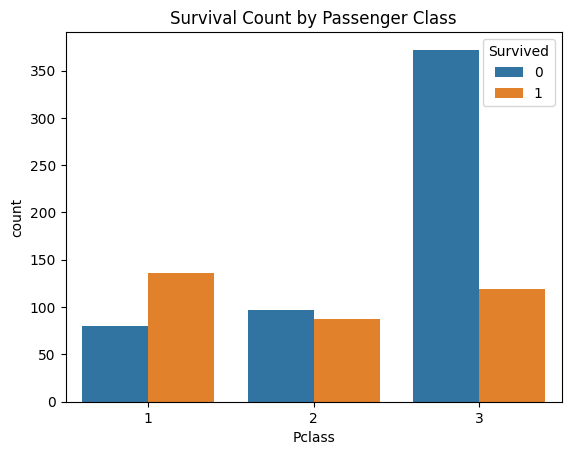

In [16]:
sbn.countplot(df, x = 'Pclass' , hue= 'Survived') # Note: countplot has the hue option
plt.title('Survival Count by Passenger Class')
plt.show()

In [17]:
# Address missing values

df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Handle missing values (example: filling missing age values with the mean)

df['Age'].fillna(df['Age'].mean() , inplace = True)

<ipython-input-18-5dbe0ec19835>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() , inplace = True)


In [19]:
# Address outliers (example: remove outliers in fare column using Z-score)
z_score = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
df = df.loc[z_score.abs()<3]

In [20]:
# Handle categorical variables (example: one-hot encoding for 'Sex' column)

df_encoded = pd.get_dummies(df, columns=['Sex'])

In [21]:
df_encoded['Sex_female'] = df_encoded['Sex_female'].astype(int)
df_encoded['Sex_male'] = df_encoded['Sex_male'].astype(int)

In [22]:
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,0,1


In [23]:
# Perform feature scaling (example: standardization of 'Age' and 'Fare' columns)

df_encoded['Age'] = (df_encoded['Age'] - df_encoded['Age'].mean()) / df_encoded['Age'].std()
df_encoded['Fare'] = (df_encoded['Fare'] - df_encoded['Fare'].mean()) / df_encoded['Fare'].std()

In [24]:
df_encoded.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.588813,1,0,A/5 21171,-0.656879,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.639674,1,0,PC 17599,1.524747,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.281691,0,0,STON/O2. 3101282,-0.633881,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.409333,1,0,113803,0.905239,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0.409333,0,0,373450,-0.629623,NaN,S,0,1


In [25]:
# Drop Un-nececcery rows

df_encoded.drop(['Name' , 'PassengerId'] , axis = 1, inplace = True)

In [26]:
# Create dummy variable and Hot-Encoding

In [27]:
df_encoded = pd.get_dummies(df_encoded , columns = ['Pclass' , 'SibSp' , 'Embarked'])

In [28]:
df_encoded[['Embarked_C','Embarked_Q','Embarked_S']]= df_encoded[['Embarked_C','Embarked_Q','Embarked_S']].astype(int)

In [29]:
df_encoded[['Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8']] = df_encoded[['Pclass_1','Pclass_2','Pclass_3','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8']].astype(int)

In [30]:
df_encoded = pd.get_dummies(df_encoded , columns = ['Parch'])

In [31]:
df_encoded[['Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4','Parch_5', 'Parch_6']] = df_encoded[['Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4','Parch_5', 'Parch_6']].astype(int)

In [32]:
df_encoded.drop(['Ticket','Cabin'] , axis = 1 , inplace= True)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis=1), df_encoded['Survived'], test_size=0.2, random_state=42)

In [34]:
# Train several models

In [35]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [36]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

Model: Logistic Regression
Accuracy: 0.7828571428571428
Precision: 0.7536231884057971
Recall: 0.7123287671232876
F1-Score: 0.7323943661971831
Model: Decision Tree
Accuracy: 0.7771428571428571
Precision: 0.7428571428571429
Recall: 0.7123287671232876
F1-Score: 0.7272727272727273
Model: Random Forest
Accuracy: 0.7714285714285715
Precision: 0.7391304347826086
Recall: 0.6986301369863014
F1-Score: 0.7183098591549296
Model: Support Vector Machine
Accuracy: 0.7828571428571428
Precision: 0.8070175438596491
Recall: 0.6301369863013698
F1-Score: 0.7076923076923077


In [37]:
# Import the necessary libraries

In [38]:
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split e data into training and testing sets


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis=1), df_encoded['Survived'], test_size=0.2, random_state=42)

In [40]:
# Initialize and train the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [41]:
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the models

In [42]:
logistic_regression_score = logistic_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)


In [43]:
print(f"Logistic Regression Score: {logistic_regression_score}")
print(f"Decision Tree Score: {decision_tree_score}")
print(f"Random Forest Score: {random_forest_score}")

Logistic Regression Score: 0.7828571428571428
Decision Tree Score: 0.7771428571428571
Random Forest Score: 0.7485714285714286


In [44]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

In [45]:
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
decision_tree_grid.fit(X_train, y_train)

best_params_grid = decision_tree_grid.best_params_
best_score_grid = decision_tree_grid.best_score_

print("Grid Search - Decision Tree")
print(f"Best Parameters: {best_params_grid}")
print(f"Best Score: {best_score_grid}")


Grid Search - Decision Tree
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8189825282631038


In [46]:
# Hyperparameter tuning using Random Search
param_dist = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}


In [47]:
decision_tree_random = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5, n_iter=10, random_state=42)
decision_tree_random.fit(X_train, y_train)

best_params_random = decision_tree_random.best_params_
best_score_random = decision_tree_random.best_score_


In [48]:
print("Random Search - Decision Tree")
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")

Random Search - Decision Tree
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 0.8175436793422405


In [49]:
# Import the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis=1), df_encoded['Survived'], test_size=0.2, random_state=42)

In [51]:
# Train a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Save the trained model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

In [53]:
# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Analyze feature importance
feature_importance = loaded_model.feature_importances_
feature_names = X_train.columns

Accuracy: 0.7714285714285715


In [54]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
       Feature  Importance
0          Age    0.256499
1         Fare    0.240402
2   Sex_female    0.127529
3     Sex_male    0.126882
6     Pclass_3    0.053310
4     Pclass_1    0.023727
14  Embarked_C    0.022206
16  Embarked_S    0.020818
5     Pclass_2    0.019806
7      SibSp_0    0.018855
17     Parch_0    0.018188
8      SibSp_1    0.015252
18     Parch_1    0.014565
19     Parch_2    0.010538
15  Embarked_Q    0.010347
9      SibSp_2    0.006012
10     SibSp_3    0.005155
11     SibSp_4    0.003281
13     SibSp_8    0.002327
21     Parch_4    0.001194
22     Parch_5    0.001001
20     Parch_3    0.000937
12     SibSp_5    0.000796
23     Parch_6    0.000376
